<a href="https://colab.research.google.com/github/Nataliia-Shap/4-course-PatternRecognition/blob/main/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Порогова обробка

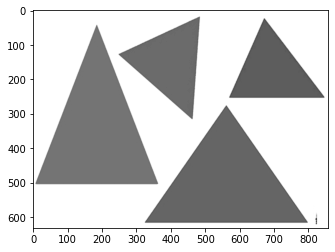

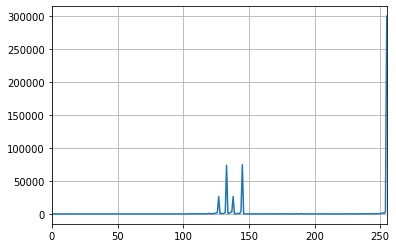

Obtained threshold:  196.0


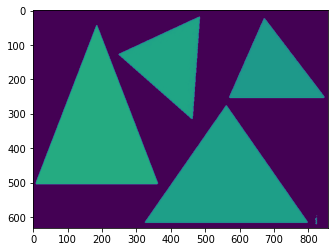

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import skimage.color
import skimage.filters
import skimage.io
rect = cv2.imread('/content/drive/My Drive/Colab Notebooks/tr.png',cv2.IMREAD_GRAYSCALE)   #cup
plt.imshow(rect,cmap="gray")
plt.show()
image = cv2.GaussianBlur(rect, (5, 5), 0)
hist = cv2.calcHist([rect], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 255])
plt.grid()
plt.show()
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)

mask = image < otsu_threshold
sel = np.zeros_like(rect)
sel[mask] = rect[mask]
# display the result
#skimage.io.imshow(sel)
plt.imshow(sel)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### k means

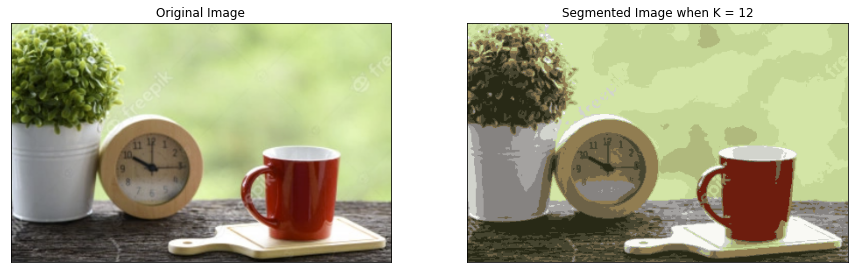

In [ ]:
cup = cv2.imread('/content/drive/My Drive/Colab Notebooks/cup.png')
img=cv2.cvtColor(cup,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 12
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### EM

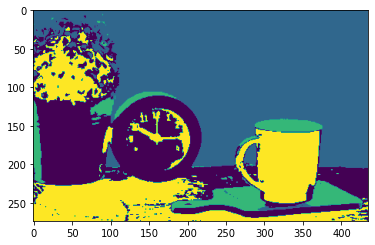

In [ ]:
rect = cv2.imread('/content/drive/My Drive/Colab Notebooks/cup.png')
img=cv2.cvtColor(rect,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=4,covariance_type='tied').fit(vectorized)
Label=model.predict(vectorized)
or_shape=img.shape
segmented=Label.reshape(or_shape[0],or_shape[1])
plt.imshow(segmented)
plt.show() 